## The data used in this notebook can be found in the following link: https://github.com/matthewfdaniels/scripts/

In [77]:
import pandas as pd
import seaborn as sns

## Using pandas' read_csv function to read the data downloaded from github

In [60]:
char = pd.read_csv('scripts-graphs/character_list5.csv', encoding='latin-1')
char_map = pd.read_csv('scripts-graphs/character_mapping.csv', encoding='latin-1')
meta = pd.read_csv('scripts-graphs/meta_data7.csv', encoding='latin-1')

## I used these functions to see what the dataframes looked like and what the data was in the tables

In [24]:
char_map.head(2)

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687


In [61]:
char.head(2)

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN


In [99]:
meta.head(2)

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...


# First Visualization

In [109]:
##Here I divided the Dataframe into two dataframes male and female
female = char.loc[char['gender'] == 'f']
male = char.loc[char['gender'] == 'm']

##This creates a Dataframe that includes the ages of both males and females
results = pd.DataFrame({'female': female['age'], 'male': male['age']})

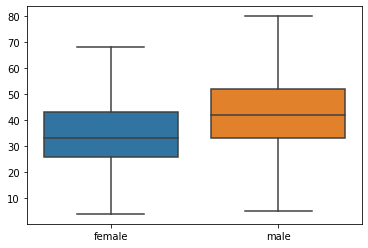

In [110]:
## The following command looks at the distribution of ages in both male and female characters
## Important to note: I used 'showfliers = False' because it removes the extreme outliers
## there were a few characters that had ages around 2000 which threw off the entire boxplot, so I decided to exclude them

## Overall we can see that female characters are generally younger than male characters
## even though both start at almost the same age in both boxplots, we can see that male characters have a higher max age
## Moreover, the interquartile range (IQR) is from ages 26-43 in females
## Whereas the IQR is from ages 33-52 in males

sns.boxplot(data=results, showfliers = False);

In [111]:
## Looking at 'max' below we can see the extreme outliers in terms of age

print(female.describe())
print(male.describe())

         script_id         words          age
count  6911.000000   6911.000000  5498.000000
mean   4215.976125    850.478513    37.429611
std    2407.064255   1207.280330    54.741686
min     280.000000    101.000000     4.000000
25%    2202.000000    194.000000    26.000000
50%    3766.000000    409.000000    33.000000
75%    6066.000000    967.000000    43.000000
max    9254.000000  16164.000000  2009.000000
          script_id         words           age
count  16132.000000  16132.000000  12763.000000
mean    4185.698054    932.652988     44.510225
std     2500.847745   1473.837449     61.621353
min      280.000000    101.000000      3.000000
25%     2046.000000    192.000000     33.000000
50%     3667.000000    391.000000     42.000000
75%     6315.000000    984.000000     52.000000
max     9254.000000  28102.000000   2013.000000


# Second Visualization

I want to find out if there is a correlation between the year in which a movie was brought out and the amount it grosses

In [121]:
corr = meta['gross'].corr(meta['year'])

In [122]:
corr

-0.2683465910462182

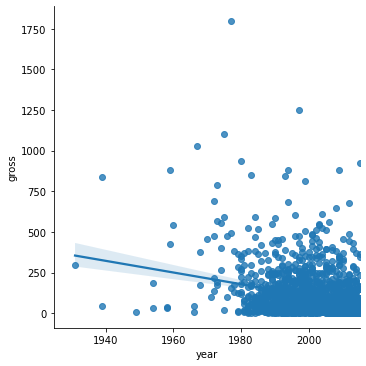

In [128]:
sns.lmplot(x='year', y='gross', data=meta);

There seems to be a negative correlation. Perhaps this can be explained by the influx of movies, but also because older movies had a longer time to gain revenue. 
Additionally, the dataset might not include high-grossing movies that have just been published because of copyright issues, or because the screenplay was not available.
All in all, this can be influenced by many factors, both in the real world as well as some inherent flaws in the dataset.